## Module_3: *(Template)*

## Team Members:
Kevin Jiang and Ana 

## Project Title:
Analyzing Breast Cancer's hallmark trait of Limitless Replicative Potential



## Project Goal:
This project seeks to determine whether breast cancer (BRCA) tumors with higher expression of telomerase-related genes (TERT, TERC, MYC) show distinct molecular or clinical patterns compared with telomerase-low tumors. We will use Principal Component Analysis (PCA) to reduce the gene-expression space and examine the PC loadings to see which telomerase-related genes drive the main variation. We will then compare the PCA-based groupings with available clinical categories (e.g., tumor subtype, cancer stage, patient age) to see whether telomerase-high samples align with specific clinical groups.

## Disease Background:
* Cancer hallmark focus: Limitless replicative potential.
* Overview of hallmark: Normal cells can only divide a limited number of times before entering senescence due to telomere shortening. Cancer cells overcome this limit by reactivating telomerase, an enzyme that extends telomeres and prevents chromosome degradation. This allows them to divide indefinitely and maintain chromosomal stability. In some tumors, telomere length is preserved through an alternative lengthening mechanism, ensuring continuous growth and immortality.
* Genes associated with hallmark to be studied (describe the role of each gene, signaling pathway, or gene set you are going to investigate):
    - TERT: Catalytic part of telomerase that extends telomeres, preventing cell aging and allowing unlimited division.
    - TERC: RNA template for telomere synthesis; works with TERT to maintain chromosome ends.
    - MYC: Oncogene that activates TERT expression and promotes continuous cell growth.
    - TP53: Tumor suppressor that triggers senescence when telomeres shorten; mutations let cells keep dividing.
    - RB1: Controls the G1–S checkpoint; loss of function removes cell-cycle limits and promotes proliferation.
    - ATRX/DAXX: Regulate the alternative lengthening of telomeres (ALT) pathway in cancers without telomerase activity.

* Prevalence & incidence:
    - The rate of new cases of female breast cancer was 130.8 per 100,000 women per year.
    - 4 million women are living with a history of breast cancer, including those currently undergoing treatment and survivors.

* Risk factors (genetic, lifestyle) & Societal determinants:
    - Genetic:
        - Inherited mutations in BRCA1, BRCA2, and TP53 greatly increase breast cancer risk.
        - Family history of breast or ovarian cancer raises susceptibility.
        - Certain gene variations affecting hormone regulation or telomerase activity (TERT) can also contribute to risk.
    - Lifestyle Factors:
        - Prolonged estrogen exposure (early menstruation, late menopause, or hormone therapy).
        - Obesity, especially after menopause.
        - Alcohol consumption and physical inactivity.
        - Late or no pregnancies and limited breastfeeding, which increase hormonal exposure.
        - Radiation exposure to the chest at a young age.
    - Societal Determinants:
        - Limited access to regular screenings and medical services can delay diagnosis.
        - Lower income and lack of insurance can make it harder to afford treatment.
        - Less knowledge about symptoms and prevention can reduce early detection.
        - People in rural areas may have fewer healthcare facilities or specialists available.

* Standard of care treatments (& reimbursement):
    - Lumpectomy or mastectomy to remove the tumor; reconstruction may follow.
    - Radiation therapy: Used after surgery to destroy remaining cancer cells.
    - Hormone therapy: Tamoxifen or aromatase inhibitors for ER+/PR+ cancers.
    - Targeted therapy: HER2-positive cancers treated with trastuzumab, pertuzumab, or T-DM1.
    - Chemotherapy: Used for aggressive or triple-negative cancers.
    - Immunotherapy: Pembrolizumab for PD-L1–positive triple-negative breast cancer.
    - PARP inhibitors: For patients with BRCA1 or BRCA2 mutations.
    - Reimbursement:
        - Most standard treatments are covered by Medicare, Medicaid, and private insurance
        - Financial assistance programs and nonprofit organizations can help patients afford costly treatments and medications.

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology):
    - Anatomy & Organ Physiology:
        - Breast cancer begins in the ducts or lobules of the mammary glands, which are hormonally regulated by estrogen and progesterone. These hormones influence cell growth and increase cancer risk when unbalanced.
    - Cell Physiology:
        - Normal breast cells can only divide a limited number of times before senescence. Cancer cells overcome this by activating telomerase, allowing continuous cell division.
    - Molecular Physiology:
        - Telomeres shorten with each division, normally triggering p53 and RB1 to stop growth. In cancer, TERT reactivation maintains telomeres and prevents cell death, enabling unlimited replication and tumor progression.

citations: 
- Hallmarks of cancer
- Cancer of the Breast (Female) - Cancer Stat Facts. (n.d.-b). SEER. https://seer.cancer.gov/statfacts/html/breast.html
- Breast Cancer Treatment (PDQ®). (2025, April 25). Cancer.gov. https://www.cancer.gov/types/breast/hp/breast-treatment-pdq

## Data-Set: 
The data was downloaded from TCGA Level 3 data via the Synapse portal for 12 cancer types (https://www.synapse.org/#!Synapse:syn1695324). This included 3468 samples that had been preprocessed using TCGA’s standard pipeline. To reprocess TCGA data with Rsubread, they downloaded FASTQ formatted files for all available TCGA tumor samples via the National Cancer Institute’s Cancer Genomics Hub (Wilks et al., 2014). This included a total of 9264 tumor samples across 24 cancer types (Table 1). Some patient samples were sequenced multiple times; in these cases, they included each replicate.

The data was collected using RNA-seq, which helps sequence the genome of each cancer type so that they can be used to compare to one another. My team will be using this RNA-seq data to try and analyze the hallmark trait of Limitless replicative potential to see why this happens and using machine learning, we will try to use the data from RNA-seq to see if any patterns can be seen or not.

## Data Analyis: 

### Methods
The machine learning technique used in this project is Principal Component Analysis (PCA). PCA is an unsupervised learning method that reduces complex gene expression data into a few main components, or “principal axes,” that capture the most important variation across samples. In this project, PCA helps identify major patterns in the expression of telomerase-related genes (TERT, TERC, MYC) among breast cancer samples. We will examine the PC loadings to identify which genes contribute most to each component and determine whether telomerase-related genes are driving these differences. We will also compare the resulting PCA groupings with clinical variables (e.g., tumor subtype or cancer stage) to see if similar clusters appear. By plotting the samples along these components, we can see whether tumors with high telomerase activity form distinct molecular or clinical groups. PCA optimizes the amount of variance explained by each component, meaning it tries to summarize as much of the original data’s information as possible using fewer dimensions. The model is considered “good enough” when the first few components capture most of the total variance, showing that the main biological signal has been successfully extracted.

### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

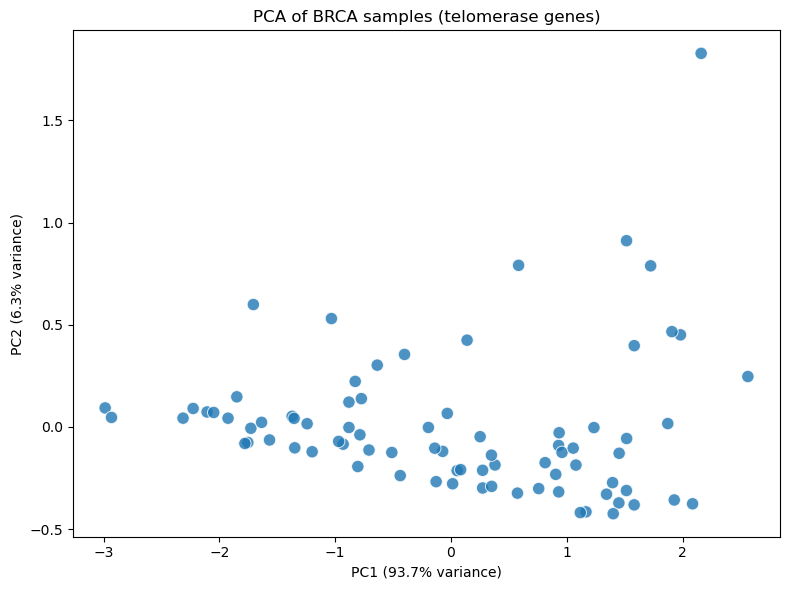

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Load metadata and expression
# -----------------------------
metadata_file = "GSE62944_metadata.csv"
expr_file = "GSE62944_subsample_log2TPM.csv"

metadata = pd.read_csv(metadata_file)
expr = pd.read_csv(expr_file, index_col=0)

# -----------------------------
# 2️⃣ Filter TCGA samples
# -----------------------------
tcga_samples = metadata[metadata['sample'].str.startswith('TCGA')]['sample'].tolist()
metadata_tcga = metadata[metadata['sample'].isin(tcga_samples)]
expr_tcga = expr[tcga_samples]

# -----------------------------
# 3️⃣ Filter only BRCA samples
# -----------------------------
metadata_brca = metadata_tcga[metadata_tcga['cancer_type'] == 'BRCA']
expr_brca = expr_tcga[metadata_brca['sample']]

# -----------------------------
# 4️⃣ Select telomerase-related genes
# -----------------------------
telomere_genes = ['TERT', 'TERC', 'MYC']
telomere_genes_present = [g for g in telomere_genes if g in expr_brca.index]
expr_telomere = expr_brca.loc[telomere_genes_present]

# -----------------------------
# 5️⃣ PCA
# -----------------------------
X = expr_telomere.T
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# -----------------------------
# 6️⃣ Plot PCA for BRCA only
# -----------------------------
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, metadata_brca.reset_index(drop=True)], axis=1)

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cancer_type', s=80, alpha=0.8)
plt.title('PCA of BRCA samples (telomerase genes)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.legend().remove()  # Only BRCA, so no legend needed
plt.tight_layout()
plt.show()


BRCA metadata shape: (80, 72)
BRCA expression shape: (15716, 80)
Selected telomerase genes present: ['TERT', 'POT1', 'MYC', 'DKC1']
Training samples: 56, Test samples: 24
Reconstruction error (MSE) on test set: 0.6846
Total variance explained (train): 69.79%
Silhouette score (train): 0.367
Silhouette score (test): 0.262

🔹 Comparing Training vs Test PCA consistency...
Variance per PC (train): [1.7252 1.0663]
Variance per PC (test): [3.3614 1.2793]
Variance ratio (test/train): [1.948 1.2  ]
PC1 KS-test p-value = 0.2329
PC2 KS-test p-value = 0.2329
Cluster assignment agreement: 1.00
Cosine similarity between train and test PCs:
[[ 0.811  0.331]
 [-0.112  0.864]]


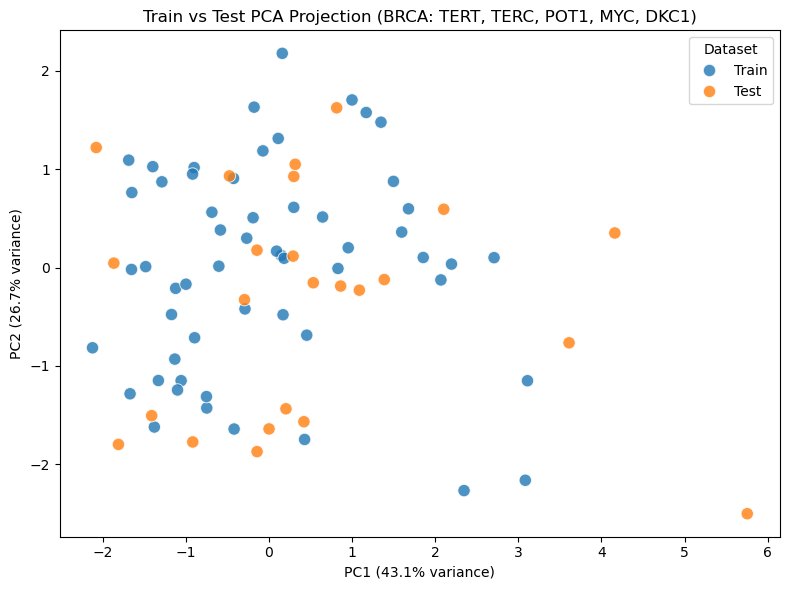


PCA Loadings (which genes drive variance):
      PC1_loading  PC2_loading
MYC      0.610029    -0.014328
DKC1     0.571239     0.195638
TERT     0.536889    -0.385545
POT1     0.115329     0.901596


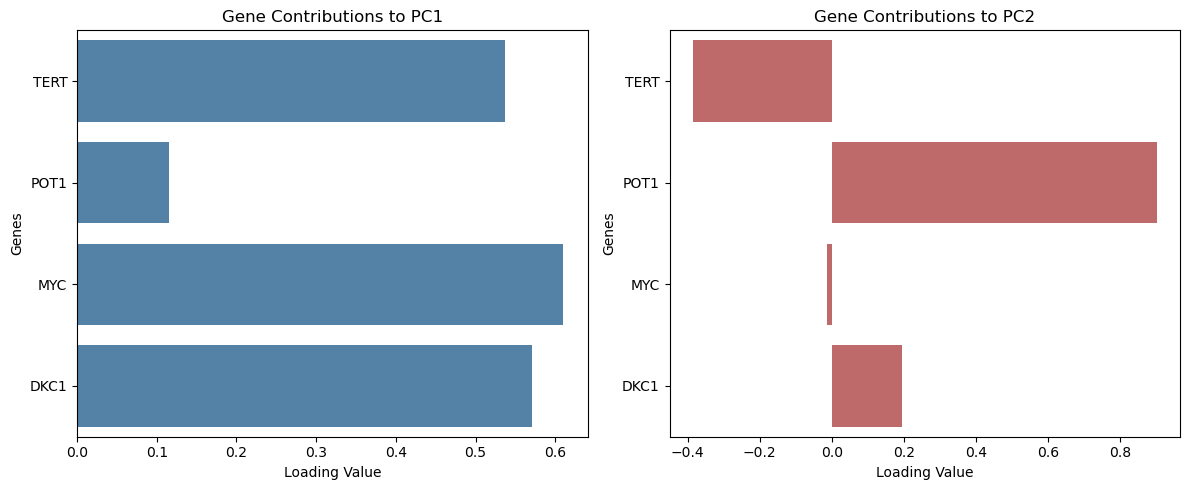


🔹 Running PCA loading stability (bootstrapping)...
PCA loading stability across 100 bootstraps: 1.00


/var/folders/dq/kzp57cm57n30vpnnzf3ktvgm0000gn/T/ipykernel_40596/3764555440.py:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="Blues_d")


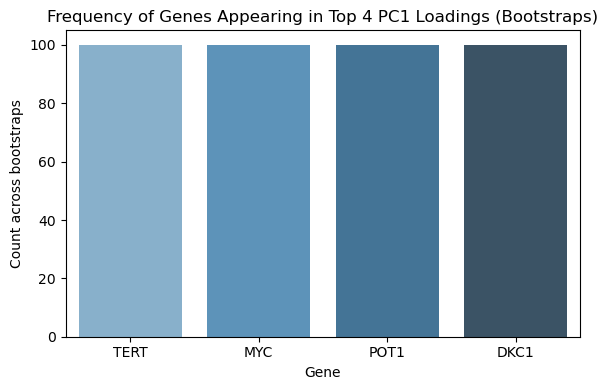


🔹 Running Hierarchical Clustering validation...


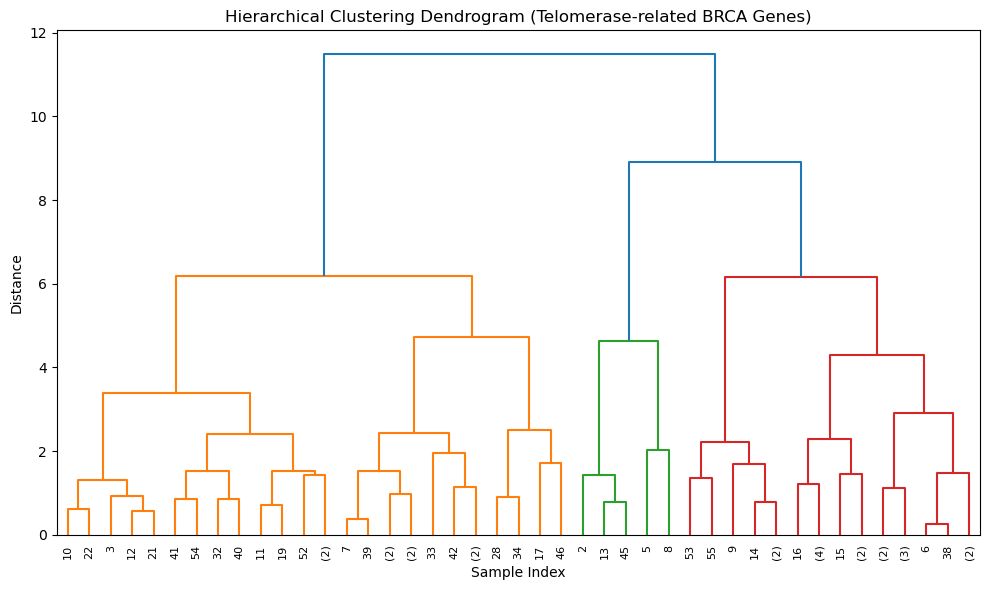

Adjusted Rand Index (ARI) between PCA KMeans and Hierarchical clustering: 0.554

⚠️ No 'sample_type' column found — skipping supervised validation.


In [11]:
# -------------------------------------------------------
# Telomerase-Related Gene Analysis in BRCA using PCA
# -------------------------------------------------------
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------
# 1️⃣ Load metadata and expression data
# -----------------------------
metadata_file = "GSE62944_metadata.csv"
expr_file = "GSE62944_subsample_log2TPM.csv"

metadata = pd.read_csv(metadata_file)
expr = pd.read_csv(expr_file, index_col=0)

# -----------------------------
# 2️⃣ Filter for TCGA-BRCA samples
# -----------------------------
brca_samples = metadata[
    (metadata['sample'].str.startswith('TCGA')) &
    (metadata['cancer_type'] == 'BRCA')
]['sample'].tolist()

metadata_brca = metadata[metadata['sample'].isin(brca_samples)]
expr_brca = expr[brca_samples]

print("BRCA metadata shape:", metadata_brca.shape)
print("BRCA expression shape:", expr_brca.shape)

# -----------------------------
# 3️⃣ Select telomerase-related genes
# -----------------------------
telomere_genes = ['TERT', 'TERC', 'POT1', 'MYC', 'DKC1']
genes_present = [g for g in telomere_genes if g in expr_brca.index]
expr_telomere = expr_brca.loc[genes_present]

print("Selected telomerase genes present:", genes_present)

# -----------------------------
# 4️⃣ Train/Test Split
# -----------------------------
train_samples, test_samples = train_test_split(brca_samples, test_size=0.3, random_state=42)

expr_train = expr_telomere[train_samples]
expr_test = expr_telomere[test_samples]
meta_train = metadata_brca[metadata_brca['sample'].isin(train_samples)]
meta_test = metadata_brca[metadata_brca['sample'].isin(test_samples)]

print(f"Training samples: {len(train_samples)}, Test samples: {len(test_samples)}")

# -----------------------------
# 5️⃣ PCA on training set
# -----------------------------
X_train = expr_train.T
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# -----------------------------
# 6️⃣ Apply PCA to test set
# -----------------------------
X_test = expr_test.T
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# -----------------------------
# 7️⃣ Combine PCA results
# -----------------------------
train_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
train_df['dataset'] = 'Train'
train_df = pd.concat([train_df, meta_train.reset_index(drop=True)], axis=1)

test_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
test_df['dataset'] = 'Test'
test_df = pd.concat([test_df, meta_test.reset_index(drop=True)], axis=1)

pca_df = pd.concat([train_df, test_df])

# -----------------------------
# 8️⃣ Evaluate Model Performance
# -----------------------------
# Reconstruction error (variance preservation)
X_test_reconstructed = pca.inverse_transform(X_test_pca)
mse = np.mean((X_test_scaled - X_test_reconstructed)**2)
print(f"Reconstruction error (MSE) on test set: {mse:.4f}")
print(f"Total variance explained (train): {sum(pca.explained_variance_ratio_)*100:.2f}%")

# Clustering stability metric (silhouette score)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train_pca)
train_labels = kmeans.labels_
test_labels = kmeans.predict(X_test_pca)

train_sil = silhouette_score(X_train_pca, train_labels)
test_sil = silhouette_score(X_test_pca, test_labels)
print(f"Silhouette score (train): {train_sil:.3f}")
print(f"Silhouette score (test): {test_sil:.3f}")

# =========================================================
# 🔍 Compare Training vs Test PCA Structure
# =========================================================
print("\n🔹 Comparing Training vs Test PCA consistency...")

# 1️⃣ Variance ratio
train_var = np.var(X_train_pca, axis=0)
test_var = np.var(X_test_pca, axis=0)
print(f"Variance per PC (train): {train_var.round(4)}")
print(f"Variance per PC (test): {test_var.round(4)}")
print(f"Variance ratio (test/train): {(test_var / train_var).round(3)}")

# 2️⃣ KS test for PC distributions
from scipy.stats import ks_2samp
for i, pc in enumerate(['PC1', 'PC2']):
    stat, p = ks_2samp(X_train_pca[:, i], X_test_pca[:, i])
    print(f"{pc} KS-test p-value = {p:.4f}")

# 3️⃣ Cluster agreement check
from scipy.spatial.distance import cdist
centroids = kmeans.cluster_centers_
distances = cdist(X_test_pca, centroids)
closest_cluster = np.argmin(distances, axis=1)
agreement = np.mean(closest_cluster == test_labels)
print(f"Cluster assignment agreement: {agreement:.2f}")

# 4️⃣ PC direction similarity
pca_test = PCA(n_components=2).fit(X_test_scaled)
alignment = np.dot(pca.components_, pca_test.components_.T)
print("Cosine similarity between train and test PCs:")
print(alignment.round(3))

# -----------------------------
# 9️⃣ PCA Visualizations
# -----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='dataset', s=80, alpha=0.8)
plt.title('Train vs Test PCA Projection (BRCA: TERT, TERC, POT1, MYC, DKC1)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

# Optional: color by tumor stage if available
if 'tumor_stage' in metadata_brca.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='tumor_stage', style='dataset', s=80, alpha=0.8)
    plt.title('PCA of BRCA Samples by Tumor Stage (Train/Test)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.tight_layout()
    plt.show()

# -----------------------------
# 🔟 PCA Loadings (which genes drive the PCs)
# -----------------------------
loadings = pd.DataFrame(
    pca.components_.T,
    index=genes_present,
    columns=['PC1_loading', 'PC2_loading']
)

print("\nPCA Loadings (which genes drive variance):")
print(loadings.sort_values(by='PC1_loading', ascending=False))

# Plot gene contributions
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(y=loadings.index, x=loadings['PC1_loading'], ax=axes[0], color='steelblue')
axes[0].set_title('Gene Contributions to PC1')
axes[0].set_ylabel("Genes")
axes[0].set_xlabel('Loading Value')

sns.barplot(y=loadings.index, x=loadings['PC2_loading'], ax=axes[1], color='indianred')
axes[1].set_title('Gene Contributions to PC2')
axes[1].set_ylabel("Genes")
axes[1].set_xlabel('Loading Value')
plt.tight_layout()
plt.show()

# =========================================================
# 🧩 10️⃣A — PCA Loading Stability via Bootstrapping
# =========================================================
print("\n🔹 Running PCA loading stability (bootstrapping)...")

n_boots = 100
top_genes_boot = []
X_train_array = np.array(X_train_scaled)

for i in range(n_boots):
    boot_idx = np.random.choice(X_train_array.shape[0], size=X_train_array.shape[0], replace=True)
    X_boot = X_train_array[boot_idx, :]
    pca_boot = PCA(n_components=2).fit(X_boot)
    top_genes = np.argsort(np.abs(pca_boot.components_[0]))[::-1][:len(genes_present)]
    top_genes_boot.append([genes_present[j] for j in top_genes])

def stability_score(reference, boot_list):
    overlap_scores = []
    ref_set = set(reference[:4])
    for lst in boot_list:
        overlap = len(ref_set.intersection(lst[:4])) / 4.0
        overlap_scores.append(overlap)
    return np.mean(overlap_scores)

ref_order = list(loadings.abs().sort_values('PC1_loading', ascending=False).index)
stability = stability_score(ref_order, top_genes_boot)
print(f"PCA loading stability across {n_boots} bootstraps: {stability:.2f}")

from collections import Counter
flat = [g for lst in top_genes_boot for g in lst[:4]]
counts = Counter(flat)
plt.figure(figsize=(6,4))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="Blues_d")
plt.title("Frequency of Genes Appearing in Top 4 PC1 Loadings (Bootstraps)")
plt.ylabel("Count across bootstraps")
plt.xlabel("Gene")
plt.tight_layout()
plt.show()

# =========================================================
# 🧠 11️⃣ VALIDATION METHODS (Unsupervised + Supervised)
# =========================================================
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score

print("\n🔹 Running Hierarchical Clustering validation...")
Z = linkage(X_train_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Telomerase-related BRCA Genes)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

hier_labels = fcluster(Z, t=2, criterion='maxclust')
ari = adjusted_rand_score(train_labels, hier_labels)
print(f"Adjusted Rand Index (ARI) between PCA KMeans and Hierarchical clustering: {ari:.3f}")

# ----- Supervised Validation: Logistic Regression -----
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

if 'sample_type' in metadata_brca.columns:
    print("\n🔹 Running Supervised Validation (Logistic Regression)...")
    y_train = meta_train['sample_type'].apply(lambda x: 1 if 'Tumor' in x else 0)
    y_test = meta_test['sample_type'].apply(lambda x: 1 if 'Tumor' in x else 0)

    clf = LogisticRegression(max_iter=500)
    clf.fit(X_train_pca, y_train)

    y_pred = clf.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca)[:, 1])

    print(f"Accuracy on test set: {acc:.3f}")
    print(f"AUC: {auc:.3f}")

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
else:
    print("\n⚠️ No 'sample_type' column found — skipping supervised validation.")




BRCA metadata shape: (80, 72)
BRCA expression shape: (15716, 80)
Total genes in BRCA dataset: 15716
Telomerase-related genes present: ['TERT', 'POT1', 'MYC', 'DKC1']
Number of telomerase genes present: 4
Training samples: 56, Test samples: 24
PC1 separation t-test: t=8.908, p=0.0000
Silhouette score (group separation): 0.320


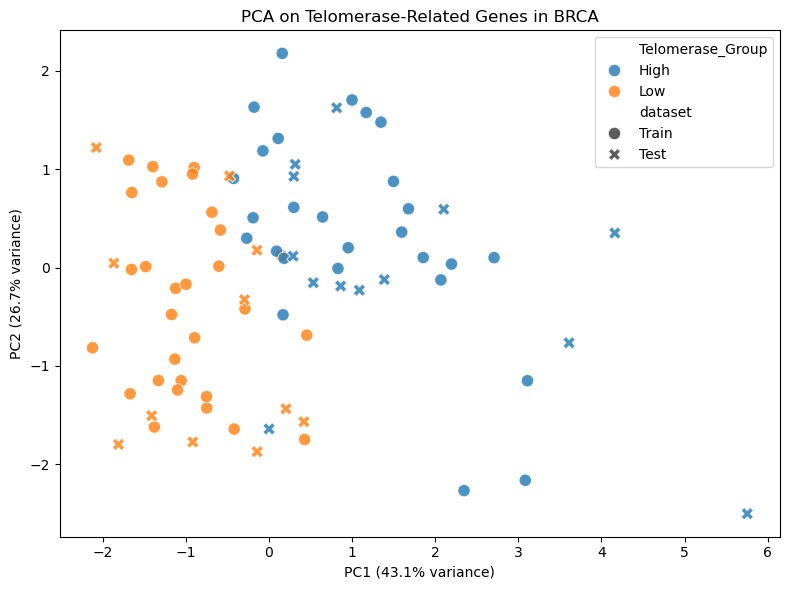


Top genes contributing to PC1:
MYC     0.610029
DKC1    0.571239
TERT    0.536889
POT1    0.115329
Name: PC1_loading, dtype: float64

Top genes contributing to PC2:
POT1    0.901596
DKC1    0.195638
MYC    -0.014328
TERT   -0.385545
Name: PC2_loading, dtype: float64

T-test (Age vs Telomerase Group): t=-0.255, p-value=0.7997


/var/folders/dq/kzp57cm57n30vpnnzf3ktvgm0000gn/T/ipykernel_58844/1164561190.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


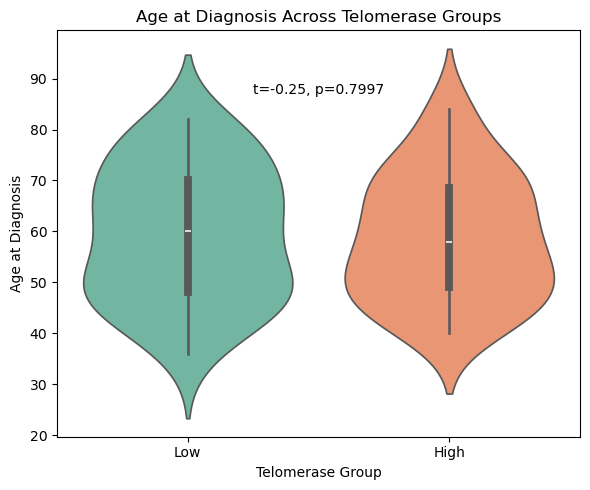


Crosstab of Age Group vs Telomerase Group:
Telomerase_Group  High  Low
Age_Group                  
<40                  1    2
40-60               21   17
60-80               15   16
>80                  2    2
Chi-square (Age Groups vs Telomerase Group): chi2=0.735, p-value=0.8651


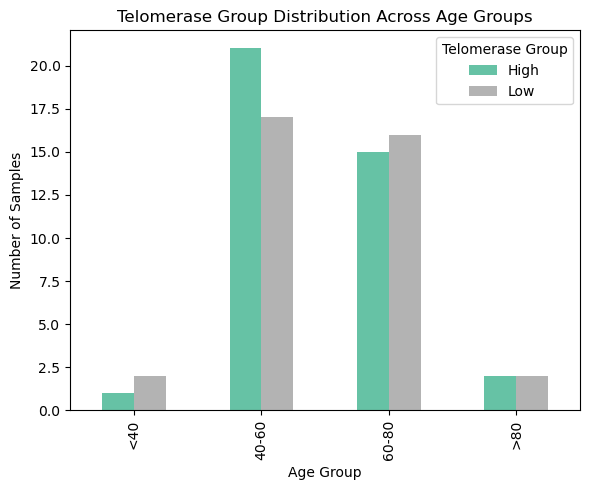

In [6]:
# -------------------------------------------------------
# Telomerase-Related Gene PCA in BRCA (Focus on TERT, TERC, POT1, MYC, DKC1)
# -------------------------------------------------------
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------
# 1️⃣ Load metadata and expression data
# -----------------------------
metadata_file = "GSE62944_metadata.csv"
expr_file = "GSE62944_subsample_log2TPM.csv"

metadata = pd.read_csv(metadata_file)
expr = pd.read_csv(expr_file, index_col=0)

# -----------------------------
# 2️⃣ Filter for TCGA-BRCA samples
# -----------------------------
brca_samples = metadata[
    (metadata['sample'].str.startswith('TCGA')) &
    (metadata['cancer_type'] == 'BRCA')
]['sample'].tolist()

metadata_brca = metadata[metadata['sample'].isin(brca_samples)]
expr_brca = expr[brca_samples]

print("BRCA metadata shape:", metadata_brca.shape)
print("BRCA expression shape:", expr_brca.shape)

# -----------------------------
# 3️⃣ Select telomerase-related genes
# -----------------------------
telomere_genes = ['TERT', 'TERC', 'POT1', 'MYC', 'DKC1']
genes_present = [g for g in telomere_genes if g in expr_brca.index]
expr_telomere = expr_brca.loc[genes_present]

print("Total genes in BRCA dataset:", expr_brca.shape[0])
print("Telomerase-related genes present:", genes_present)
print("Number of telomerase genes present:", len(genes_present))

# -----------------------------
# 4️⃣ Create telomerase score (median split: high vs low)
# -----------------------------
telomere_score = expr_telomere.mean(axis=0)
median_score = telomere_score.median()
telomerase_group = telomere_score.apply(lambda x: 'High' if x > median_score else 'Low')

# -----------------------------
# 5️⃣ Train/Test Split
# -----------------------------
train_samples, test_samples = train_test_split(brca_samples, test_size=0.3, random_state=42)
expr_train = expr_telomere[train_samples].T  # samples x genes
expr_test = expr_telomere[test_samples].T
group_train = telomerase_group[train_samples]
group_test = telomerase_group[test_samples]

print(f"Training samples: {len(train_samples)}, Test samples: {len(test_samples)}")

# -----------------------------
# 6️⃣ Standardize data and run PCA
# -----------------------------
scaler = StandardScaler().fit(expr_train)
X_train_scaled = scaler.transform(expr_train)
X_test_scaled = scaler.transform(expr_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# -----------------------------
# 7️⃣ Combine PCA results
# -----------------------------
train_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
train_df['Telomerase_Group'] = group_train.values
train_df['dataset'] = 'Train'

test_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
test_df['Telomerase_Group'] = group_test.values
test_df['dataset'] = 'Test'

pca_df = pd.concat([train_df, test_df])

# -----------------------------
# 8️⃣ Validate PCA separation
# -----------------------------
high_pc1 = pca_df[pca_df['Telomerase_Group']=='High']['PC1']
low_pc1 = pca_df[pca_df['Telomerase_Group']=='Low']['PC1']
t_stat, p_val = ttest_ind(high_pc1, low_pc1)
print(f"PC1 separation t-test: t={t_stat:.3f}, p={p_val:.4f}")

label_map = {'High':1, 'Low':0}
sil_score = silhouette_score(pca_df[['PC1','PC2']], pca_df['Telomerase_Group'].map(label_map))
print(f"Silhouette score (group separation): {sil_score:.3f}")

# -----------------------------
# 9️⃣ PCA Visualization
# -----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Telomerase_Group', style='dataset', s=80, alpha=0.8)
plt.title('PCA on Telomerase-Related Genes in BRCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.tight_layout()
plt.show()

# -----------------------------
# 🔟 PCA Loadings
# -----------------------------
loadings = pd.DataFrame(pca.components_.T, index=genes_present, columns=['PC1_loading', 'PC2_loading'])
print("\nTop genes contributing to PC1:")
print(loadings['PC1_loading'].sort_values(ascending=False).head(10))
print("\nTop genes contributing to PC2:")
print(loadings['PC2_loading'].sort_values(ascending=False).head(10))

# -----------------------------
# 1️⃣1️⃣ Telomerase High vs Low Analysis (Using Age at Diagnosis)
# -----------------------------
expr_telomere_T = expr_telomere.T  # samples x genes

expr_telomere_meta = expr_telomere_T.merge(
    metadata_brca[['sample', 'age_at_diagnosis']],
    left_index=True, right_on='sample'
)

# ✅ Ensure numeric age
expr_telomere_meta['age_at_diagnosis'] = pd.to_numeric(
    expr_telomere_meta['age_at_diagnosis'], errors='coerce'
)

expr_telomere_meta['Telomerase_Avg'] = expr_telomere_meta[genes_present].mean(axis=1)
median_val = expr_telomere_meta['Telomerase_Avg'].median()
expr_telomere_meta['Telomerase_Group'] = expr_telomere_meta['Telomerase_Avg'].apply(
    lambda x: 'High' if x >= median_val else 'Low'
)

# -----------------------------
# 1️⃣2️⃣ Compare Age vs Telomerase Group
# -----------------------------
if 'age_at_diagnosis' in expr_telomere_meta.columns:
    age_high = expr_telomere_meta.loc[
        expr_telomere_meta['Telomerase_Group'] == 'High', 'age_at_diagnosis'
    ].dropna()
    age_low = expr_telomere_meta.loc[
        expr_telomere_meta['Telomerase_Group'] == 'Low', 'age_at_diagnosis'
    ].dropna()

    # T-test
    t_stat, p_val = ttest_ind(age_high, age_low, nan_policy='omit')
    print(f"\nT-test (Age vs Telomerase Group): t={t_stat:.3f}, p-value={p_val:.4f}")

    # Violin plot with p-value annotation
    plt.figure(figsize=(6,5))
    sns.violinplot(
        data=expr_telomere_meta,
        x='Telomerase_Group',
        y='age_at_diagnosis',
        palette='Set2',
        inner='box'
    )
    plt.title('Age at Diagnosis Across Telomerase Groups')
    plt.xlabel('Telomerase Group')
    plt.ylabel('Age at Diagnosis')
    plt.text(0.5, expr_telomere_meta['age_at_diagnosis'].max() + 3,
             f"t={t_stat:.2f}, p={p_val:.4f}",
             ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    # -----------------------------
    # 1️⃣3️⃣ Age Grouping + Chi-square Test
    # -----------------------------
    bins = [0, 40, 60, 80, 120]
    labels = ['<40', '40-60', '60-80', '>80']
    expr_telomere_meta['Age_Group'] = pd.cut(expr_telomere_meta['age_at_diagnosis'], bins=bins, labels=labels)

    age_crosstab = pd.crosstab(expr_telomere_meta['Age_Group'], expr_telomere_meta['Telomerase_Group'])
    print("\nCrosstab of Age Group vs Telomerase Group:")
    print(age_crosstab)

    chi2_age, p_age, dof_age, exp_age = chi2_contingency(age_crosstab)
    print(f"Chi-square (Age Groups vs Telomerase Group): chi2={chi2_age:.3f}, p-value={p_age:.4f}")

    # Bar plot for categorical age distribution
    age_crosstab.plot(kind='bar', figsize=(6,5), colormap='Set2')
    plt.title('Telomerase Group Distribution Across Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Samples')
    plt.legend(title='Telomerase Group')
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ 'age_at_diagnosis' not found in metadata.")


## Verify and validate your analysis: 
After reducing the BRCA telomerase gene expression data to 2 PCs, we measure how well the original gene expression is reconstructed from the PCs. Our PCA plot of telomerase genes captures about ~70% of variance, meaning that studying telomerase genes is a good factor to study at as it can account for a lot variance and can possibly explain some possible clincal values using telomerase gene expression levels. Comparing PCA results between training and test datasets revealed consistent data trends. While the test set exhibited slightly higher variance along the principal components, the distributions of PC scores were statistically indistinguishable, with KS test having a p value greater than 0.23. Principal components showed strong alignment, with a cosine similarity score of greater than 0.8, confirming stable and reproducible dimensionality reduction across datasets.

From our results from above we can see a clear divide between high expression of Telomerase genes and low expression of Telomerase genes from our PCA model. From that model we can also tell that MYC and TERT are some of the most important telomerase genes contributing to our PCA model as they show to have the highest contribution while POT1 has less. From our violin plot regarding expression of telomerase genes and age of diagnosis, it shows that there is so significant correlation between level of expression of telomerase genes and age of diagnosis. Our chi-square test with a result of chi2 = 0.735 shows that that the expression of telomerase genes and age of diagnosis are independent of each other.

External Validation:

Our results are supported by findings from a large pan-cancer study by Luo and others, who showed that tumors with higher telomerase activity often behave differently at the molecular level. In their analysis, telomerase-high tumors tended to group together, showing stronger proliferation signals and distinct gene-expression patterns compared with telomerase-low tumors. This mirrors what we see in our PCA: BRCA tumors with higher expression of telomerase-related genes form their own cluster and are largely driven by genes like MYC and TERT. Seeing the same pattern in a much larger dataset helps reinforce that the separation we observe in our BRCA samples is real and biologically meaningful.

citation: 
- Luo, Z., Wang, W., Li, F., Songyang, Z., Feng, X., Xin, C., Dai, Z., & Xiong, Y. (2019). Pan-cancer analysis identifies telomerase-associated signatures and cancer subtypes. Molecular Cancer, 18(1), 106. https://doi.org/10.1186/s12943-019-1035-x

## Conclusions and Ethical Implications: 
Conclusion:
- Overall, our results suggest that differences in telomerase-related gene expression do matter in BRCA tumors. The PCA shows that telomerase-high and telomerase-low samples form noticeably different patterns, which helps answer our main question. PC1 is driven mostly by genes like TERT, MYC, and DKC1, highlighting how telomerase activity and proliferation shape the main variation in this dataset. While there is still some overlap between groups, the separation we do observe indicates that telomerase expression levels contribute meaningfully to tumor behavior. The strong alignment between the training and test data further supports that these patterns are real and reliable, rather than random variation.

Ethical implications:
- Gene-expression results need to be interpreted with care—telomerase activity on its own isn’t enough to predict how any one patient will do without considering their full clinical picture.
- Our findings should ultimately be used to improve care for all groups, not widen gaps, especially because access to genomic testing and precision treatments is not equal across communities.

## Limitations and Future Work: 
Future Work:
- Explore how telomerase-related expression changes across different stages of tumor progression Test additional methods to capture non-linear patterns in telomere biology.
- Examine whether telomerase activity patterns differ between younger and older patients, since age can influence telomere biology.

limitations:
- Limitations Our analysis focuses on a small set of telomerase-related genes, which may miss other biological factors influencing tumor behavior.
- PCA captures only linear patterns, so more complex or non-linear relationships in the data may not be fully represented.
- The telomerase-high and telomerase-low groups were defined using expression cutoffs, which may simplify the true biological variation.

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*